# Introduction to Data Science 2025

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="font-weight: bold"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in the course material.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle or <span style="font-weight: 500">directly from the course material</span>, and complete the following exercises. If you choose to download the dataset from Kaggle, you will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="font-weight: 500"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="font-weight: 500"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [186]:
# Use this cell for your code
import pandas as pd 
titanic = pd.read_csv('train.csv')
print(titanic.shape)
print(titanic.head())


(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="font-weight: 500"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="font-weight: 500"> *Hint: The shape of the data should now be (891, 9).*</span>

In [187]:
# Use this cell for your code

titanic = titanic.drop(["Name", "Ticket", "Embarked"], axis = 1)
print(titanic.shape)
print(titanic.head())

(891, 9)
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin
0            1         0       3    male  22.0      1      0   7.2500   NaN
1            2         1       1  female  38.0      1      0  71.2833   C85
2            3         1       3  female  26.0      0      0   7.9250   NaN
3            4         1       1  female  35.0      1      0  53.1000  C123
4            5         0       3    male  35.0      0      0   8.0500   NaN


3. The column <span style="font-weight: 500">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="font-weight: 500">*Cabin*</span>-column.

<span style="font-weight: 500">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [188]:
# Use this cell for your code
titanic["Deck"] = titanic["Cabin"].str[0]
titanic = titanic.drop(["Cabin"], axis = 1)
print(titanic)
print(titanic.columns)
# Show the column names with repr to see hidden spaces
for col in titanic.columns:
    print(repr(col))



     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Deck
0              1         0       3    male  22.0      1      0   7.2500  NaN
1              2         1       1  female  38.0      1      0  71.2833    C
2              3         1       3  female  26.0      0      0   7.9250  NaN
3              4         1       1  female  35.0      1      0  53.1000    C
4              5         0       3    male  35.0      0      0   8.0500  NaN
..           ...       ...     ...     ...   ...    ...    ...      ...  ...
886          887         0       2    male  27.0      0      0  13.0000  NaN
887          888         1       1  female  19.0      0      0  30.0000    B
888          889         0       3  female   NaN      1      2  23.4500  NaN
889          890         1       1    male  26.0      0      0  30.0000    C
890          891         0       3    male  32.0      0      0   7.7500  NaN

[891 rows x 9 columns]
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', '

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="font-weight: 500">*Hint: Pandas can do this for you.*</span>

In [189]:
# Use this cell for your code
titanic["Sex"] = titanic["Sex"].astype("category").cat.codes
titanic["Deck"] = titanic["Deck"].astype("category").cat.codes







5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="font-weight: 500">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [190]:
#continuous

titanic["Age"]= titanic["Age"].fillna(titanic["Age"].mean())
titanic["Fare"]= titanic["Fare"].fillna(titanic["Fare"].mean())
 #categorical 
titanic["Deck"] = titanic["Deck"].fillna(titanic["Deck"].mode()[0]) 
titanic["Pclass"] = titanic["Pclass"].fillna(titanic["Pclass"].mode()[0]) 
titanic["Sex"] = titanic["Sex"].fillna(titanic["Sex"].mode()[0])
print(titanic)


     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.000000      1      0   7.2500   
1              2         1       1    0  38.000000      1      0  71.2833   
2              3         1       3    0  26.000000      0      0   7.9250   
3              4         1       1    0  35.000000      1      0  53.1000   
4              5         0       3    1  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    1  27.000000      0      0  13.0000   
887          888         1       1    0  19.000000      0      0  30.0000   
888          889         0       3    0  29.699118      1      2  23.4500   
889          890         1       1    1  26.000000      0      0  30.0000   
890          891         0       3    1  32.000000      0      0   7.7500   

     Deck  
0      -1  
1       2  
2      -1  
3       2  
4      -1  
.. 

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="font-weight: 500"> .csv</span> file. Then, write another file, this time in <span style="font-weight: 500">JSON</span> format, with the following structure:

In [191]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [192]:
# Use this cell for your code
titanic.to_csv("titanic_processed.csv", index=False)
titanic.to_json("titanic_processed.json", orient="records", indent=4)


Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [ ]:
# Use this cell for your code

median_age = titanic["Age"].mean()
fare_mean = titanic["Fare"].mean()
pclass_mode = titanic["Pclass"].mode()[0]
sex_mode = titanic["Sex"].mode()[0]
SibSp_mode = titanic["SibSp"].mode()[0]
parch_mode = titanic["Parch"].mode()[0]
Deck_mode = titanic["Deck"].mode()[0]
survived_mode = titanic["Survived"].mode()[0]
print(median_age)
print(fare_mean)
print(pclass_mode)
print(sex_mode)
print(SibSp_mode)
print(parch_mode)
print(Deck_mode)
print(survived_mode)


29.69911764705882
32.204207968574636
3
1
0
0
-1
0
     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.000000      1      0   7.2500   
1              2         1       1    0  38.000000      1      0  71.2833   
2              3         1       3    0  26.000000      0      0   7.9250   
3              4         1       1    0  35.000000      1      0  53.1000   
4              5         0       3    1  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    1  27.000000      0      0  13.0000   
887          888         1       1    0  19.000000      0      0  30.0000   
888          889         0       3    0  29.699118      1      2  23.4500   
889          890         1       1    1  26.000000      0      0  30.0000   
890          891         0       3    1  32.000000      0      0   7.7500   

     Deck  
0      -1  
1

2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="font-weight: 500">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="font-weight: 500">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [219]:
# Use this cell for your code

#spliting the original df
survived_df = titanic[titanic["Survived"]==1]
not_survived_df = titanic[titanic["Survived"]==0]

#survived
s_median_age = survived_df["Age"].mean()
s_fare_mean = survived_df["Fare"].mean()
s_pclass_mode = survived_df["Pclass"].mode()[0]
s_sex_mode = survived_df["Sex"].mode()[0]
s_SibSp_mode = survived_df["SibSp"].mode()[0]
s_parch_mode = survived_df["Parch"].mode()[0]
s_Deck_mode = survived_df["Deck"].mode()[0]
s_survived_mode = survived_df["Survived"].mode()[0]

print(
    "The average survivor had a median age of ", s_median_age, 
    "payed a fare of ", s_fare_mean,
    "was travelling in class", s_pclass_mode,
    "was a ", s_sex_mode,
    "had", s_SibSp_mode, "siblings/spouses aboard the titanic",
    "had", s_parch_mode, "parents/children aboard",
    "were travelling in deck", s_Deck_mode,
    )

# not survived
n_median_age = not_survived_df["Age"].mean()
n_fare_mean = not_survived_df["Fare"].mean()
n_pclass_mode = not_survived_df["Pclass"].mode()[0]
n_sex_mode = not_survived_df["Sex"].mode()[0]
n_SibSp_mode = not_survived_df["SibSp"].mode()[0]
n_parch_mode = not_survived_df["Parch"].mode()[0]
n_Deck_mode = not_survived_df["Deck"].mode()[0]
n_survived_mode = not_survived_df["Survived"].mode()[0]

print(
    "The average not survivor had a median age of ", n_median_age, 
    "payed a fare of ", n_fare_mean,
    "was travelling in class", n_pclass_mode,
    "was a ", n_sex_mode,
    "had", n_SibSp_mode, "siblings/spouses aboard the titanic",
    "had", n_parch_mode, "parents/children aboard",
    "were travelling in deck", n_Deck_mode,
    )



The average survivor had a median age of  28.549778121775027 payed a fare of  48.39540760233918 was travelling in class 1 was a  0 had 0 siblings/spouses aboard the titanic had 0 parents/children aboard were travelling in deck -1
The average not survivor had a median age of  30.415099646415943 payed a fare of  22.117886885245902 was travelling in class 3 was a  1 had 0 siblings/spouses aboard the titanic had 0 parents/children aboard were travelling in deck -1


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="font-weight: 500">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

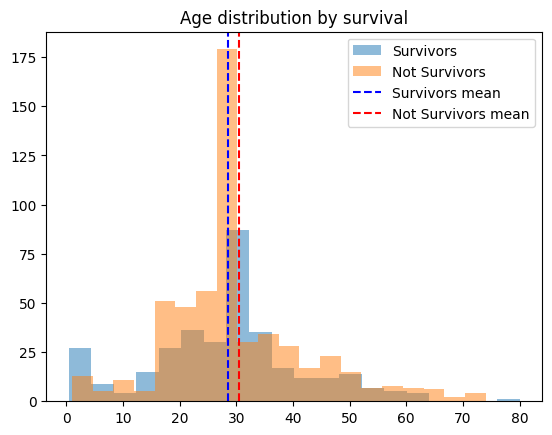

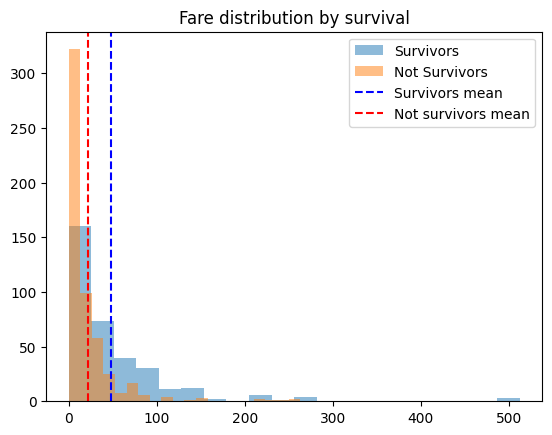

In [225]:
# Use this cell for your code
import matplotlib.pyplot as plt

survived_df = survived_df.copy()
not_survived_df = not_survived_df.copy()


# Distribución de edades
plt.hist(survived_df["Age"], bins=20, alpha=0.5, label="Survivors")
plt.hist(not_survived_df["Age"], bins=20, alpha=0.5, label="Not Survivors")
plt.axvline(survived_df["Age"].mean(), color="blue", linestyle="--", label="Survivors mean")
plt.axvline(not_survived_df["Age"].mean(), color="red", linestyle="--", label="Not Survivors mean")
plt.legend()
plt.title("Age distribution by survival")
plt.show()

# Distribución de tarifa
plt.hist(survived_df["Fare"], bins=20, alpha=0.5, label="Survivors")
plt.hist(not_survived_df["Fare"], bins=20, alpha=0.5, label="Not Survivors")
plt.axvline(survived_df["Fare"].mean(), color="blue", linestyle="--", label="Survivors mean")
plt.axvline(not_survived_df["Fare"].mean(), color="red", linestyle="--", label="Not survivors mean")
plt.legend()
plt.title("Fare distribution by survival")
plt.show()

import numpy as np

# Variables que nos interesan
features = ["Age", "Fare", "Pclass", "Sex", "Deck"]

# Calcular "promedio representativo" de cada grupo
survivor_rep = survived_df[features].mean()
nonsurvivor_rep = not_survived_df[features].mean()

# Distancia de cada pasajero a su "representante promedio"
survived_df["dist_to_survivor_rep"] = np.linalg.norm(survived_df[features] - survivor_rep, axis=1)
not_survived_df["dist_to_nonsurvivor_rep"] = np.linalg.norm(not_survived_df[features] - nonsurvivor_rep, axis=1)

# Pasajero más cercano al representante de su grupo
closest_survivor = survived_df.loc[survived_df["dist_to_survivor_rep"].idxmin()]
closest_nonsurvivor = not_survived_df.loc[not_survived_df["dist_to_nonsurvivor_rep"].idxmin()]

# Distancia de sobrevivientes al promedio de los que no sobrevivieron
survived_df["dist_to_nonsurvivor_rep"] = np.linalg.norm(survived_df[features] - nonsurvivor_rep, axis=1)

# Distancia de no sobrevivientes al promedio de los sobrevivientes
not_survived_df["dist_to_survivor_rep"] = np.linalg.norm(not_survived_df[features] - survivor_rep, axis=1)

# El "sobreviviente más parecido a un no sobreviviente promedio"
survivor_like_non = survived_df.loc[survived_df["dist_to_nonsurvivor_rep"].idxmin()]

# El "no sobreviviente más parecido a un sobreviviente promedio"
non_like_survivor = not_survived_df.loc[not_survived_df["dist_to_survivor_rep"].idxmin()]





4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="font-weight: 500">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="font-weight: 500">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

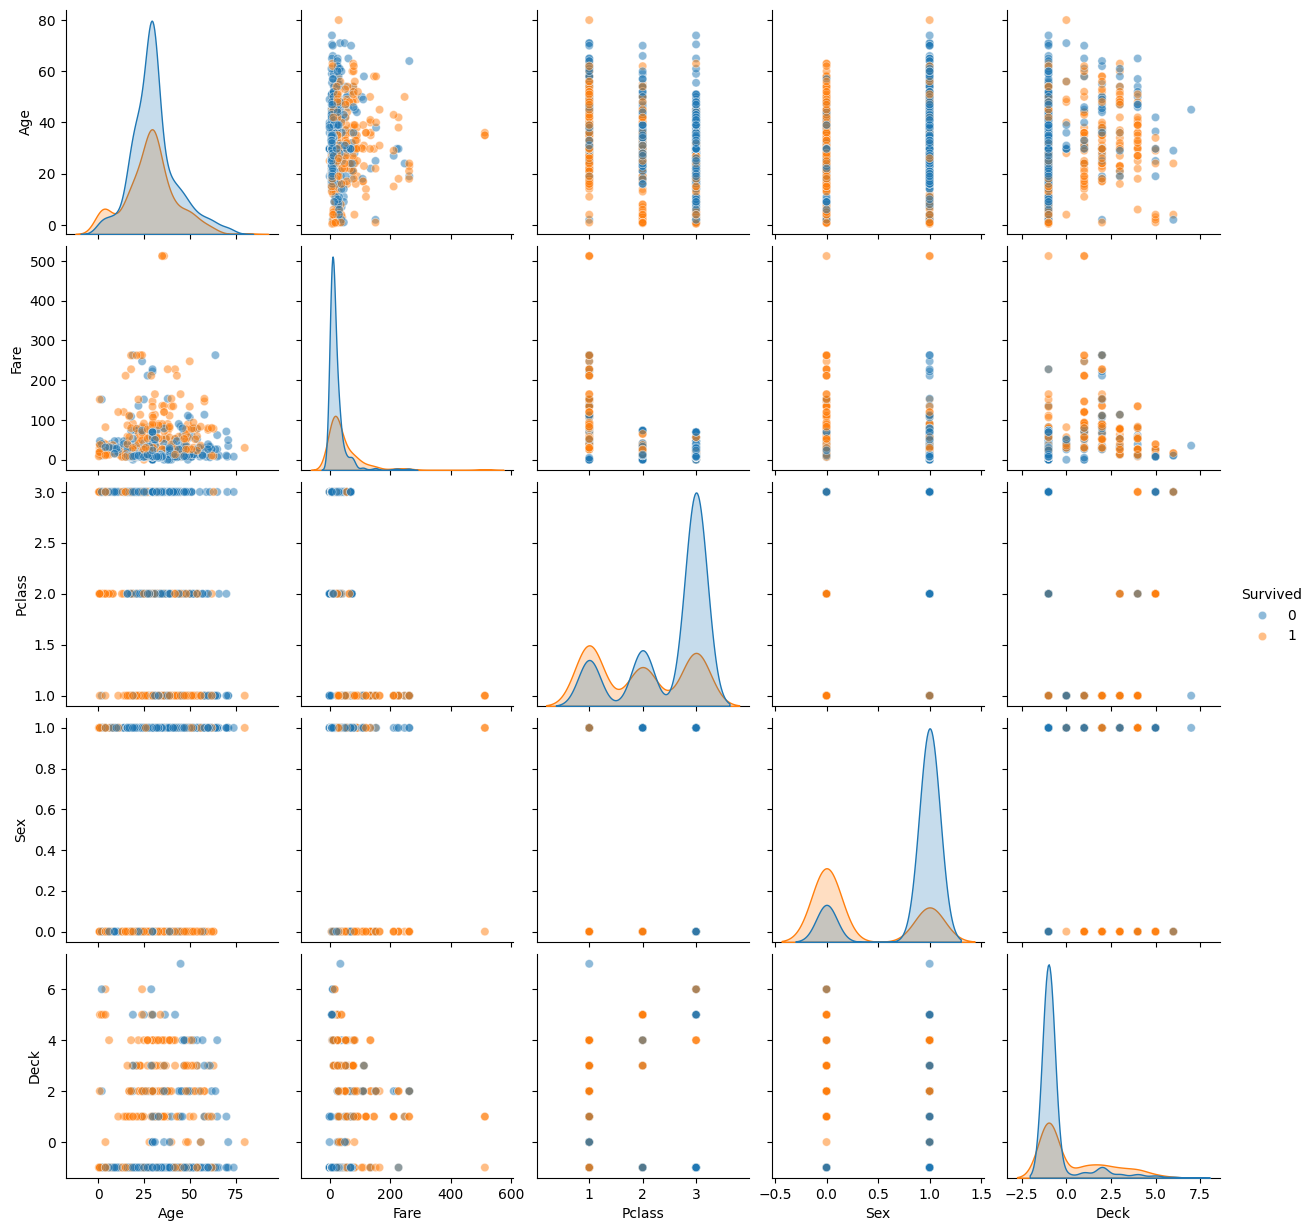

In [226]:
# Use this cell for your code
import seaborn as sns
sns.pairplot(titanic[["Age", "Fare", "Pclass", "Sex", "Deck", "Survived"]],
             hue="Survived", diag_kind="kde", plot_kws={"alpha":0.5})
plt.show()

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*
As we filled the missing values with either themean or the mode we avoid shrinking the population we are working on,
most of the individuals that were missing a value were just missing one, so skipping one would have been useless, since
skipping them would have meant to loose precious data of another variable.

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="font-weight: 500">pos.txt</span> and <span style="font-weight: 500">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on the MOOC platform after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [ ]:
# Use this cell for your code
from collections import Counter
import re

def load_and_count(file_path, top_n=15):
    # read file
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read().lower()
    
        words = re.findall(r'\b[a-z]+\b', text)
       
    counter = Counter(words)
    
    return counter.most_common(top_n)

pos_counts = load_and_count("pos.txt", top_n=15)
neg_counts = load_and_count("neg.txt", top_n=15)

print("Most common positive words:")
for word, freq in pos_counts:
    print(f"{word}: {freq}")

print("\nMost common negative words:")
for word, freq in neg_counts:
    print(f"{word}: {freq}")


Most common positive words:
great: 435906
work: 427780
use: 345233
good: 291448
fit: 273505
instal: 229408
product: 210084
look: 181401
just: 180420
like: 175725
easi: 162864
light: 147321
car: 147195
price: 144891
need: 136519

Most common negative words:
work: 39998
use: 37244
fit: 31293
product: 24394
just: 23580
light: 22907
like: 20685
time: 19665
look: 18824
instal: 18709
did: 18446
good: 17295
dont: 17136
buy: 16885
car: 16694


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="font-weight: 500">2 x m</span> matrix, where <span style="font-weight: 500">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="font-weight: 500">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [ ]:
# Use this cell for your code
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

with open("pos.txt", "r", encoding="utf-8") as f:
    positive_text = f.read()

with open("neg.txt", "r", encoding="utf-8") as f:
    negative_text = f.read()

documents = [positive_text, negative_text]

vectorizer = TfidfVectorizer(stop_words="english")  # remove common stopwords
tfidf_matrix = vectorizer.fit_transform(documents)

feature_names = vectorizer.get_feature_names_out()
tfidf_array = tfidf_matrix.toarray()

df = pd.DataFrame(tfidf_array, index=["Positive", "Negative"], columns=feature_names)

print("TF-IDF matrix:")
print(df)


TF-IDF matrix:
                00       000      0000     00000    000000  00000000  \
Positive  0.000373  0.000072  0.000046  0.000003  0.000002  0.000000   
Negative  0.000220  0.000174  0.000061  0.000008  0.000008  0.000011   

          000000000000000000058  000000000000002  00000000004   0000001  ...  \
Positive               0.000001         0.000001     0.000004  0.000002  ...   
Negative               0.000000         0.000000     0.000000  0.000000  ...   

            zzzzip         zzzzz  zzzzzooooo        zzzzzz   zzzzzzt  \
Positive  0.000001  8.434415e-07    0.000001  8.434415e-07  0.000000   
Negative  0.000000  1.516006e-05    0.000000  7.580028e-06  0.000011   

           zzzzzzz  zzzzzzzz  zzzzzzzzip  zzzzzzzzzzzzzz  zzzzzzzzzzzzzzzzzzzz  
Positive  0.000000  0.000001    0.000001        0.000001              0.000002  
Negative  0.000011  0.000000    0.000000        0.000000              0.000000  

[2 rows x 235414 columns]


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [ ]:
# Use this cell for your code
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

with open("pos.txt", "r", encoding="utf-8") as f:
    positive_text = f.read()

with open("neg.txt", "r", encoding="utf-8") as f:
    negative_text = f.read()

documents = [positive_text, negative_text]

vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

df = pd.DataFrame(tfidf_matrix.toarray(), 
                  index=["Positive", "Negative"], 
                  columns=feature_names)


def top_words(row, n=10):
    sorted_idx = np.argsort(-row.values)[:n]
    return [(row.index[i], row.values[i]) for i in sorted_idx]

print("Top Positive words:")
print(top_words(df.loc["Positive"], n=10))

print("\nTop Negative words:")
print(top_words(df.loc["Negative"], n=10))


Top Positive words:
[('great', 0.3676612237086617), ('work', 0.3608074178334121), ('use', 0.29118384983141415), ('good', 0.24581934712401768), ('fit', 0.2306854757457744), ('instal', 0.1934922345839623), ('product', 0.1771935704523693), ('look', 0.1530011370386619), ('just', 0.15217372089743375), ('like', 0.14821376291265684)]

Top Negative words:
[('work', 0.30318594996163367), ('use', 0.28231055353695395), ('fit', 0.23720180839415475), ('product', 0.18490719694394947), ('just', 0.1787370543551008), ('light', 0.1736356956790625), ('like', 0.1567928740176107), ('time', 0.14906124571217375), ('look', 0.1426864423740635), ('instal', 0.14181473918276424)]


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="font-weight: 500">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

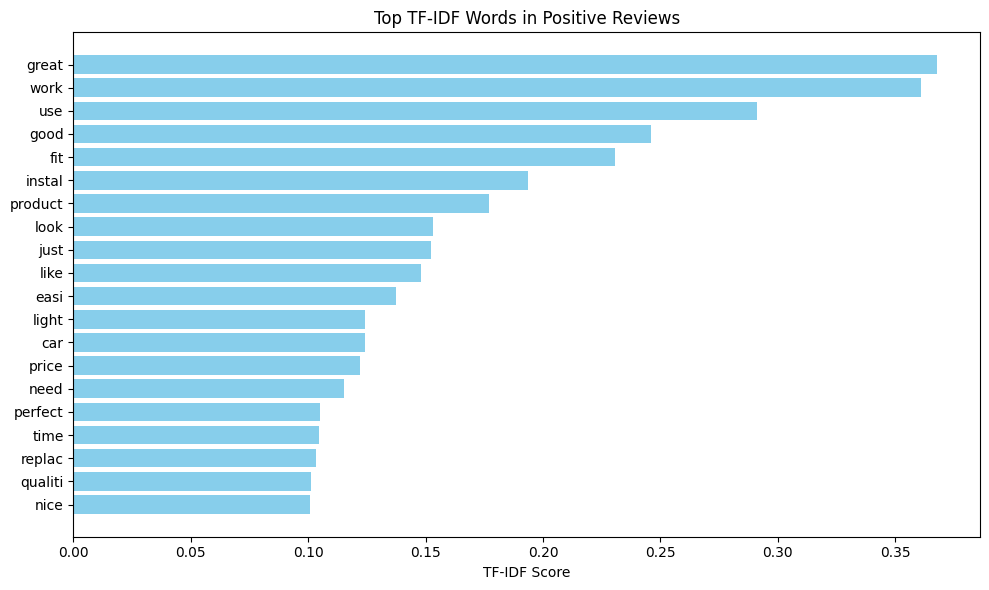

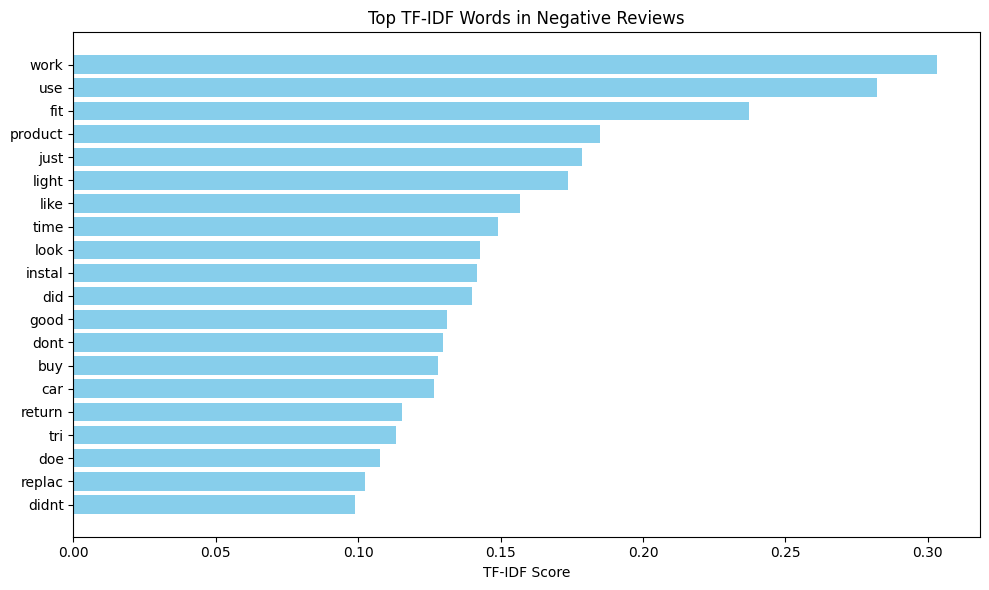

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("pos.txt", "r", encoding="utf-8") as f:
    positive_text = f.read()
with open("neg.txt", "r", encoding="utf-8") as f:
    negative_text = f.read()

documents = [positive_text, negative_text]


vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), index=["Positive", "Negative"], columns=feature_names)

def top_words(row, n=20):
    sorted_idx = np.argsort(-row.values)[:n]
    return row.index[sorted_idx], row.values[sorted_idx]

def plot_tfidf_bar(row, title, n=20):
    words, scores = top_words(row, n)
    plt.figure(figsize=(10,6))
    plt.barh(words[::-1], scores[::-1], color='skyblue')
    plt.xlabel("TF-IDF Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_tfidf_bar(df.loc["Positive"], "Top TF-IDF Words in Positive Reviews", n=20)
plot_tfidf_bar(df.loc["Negative"], "Top TF-IDF Words in Negative Reviews", n=20)



**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**

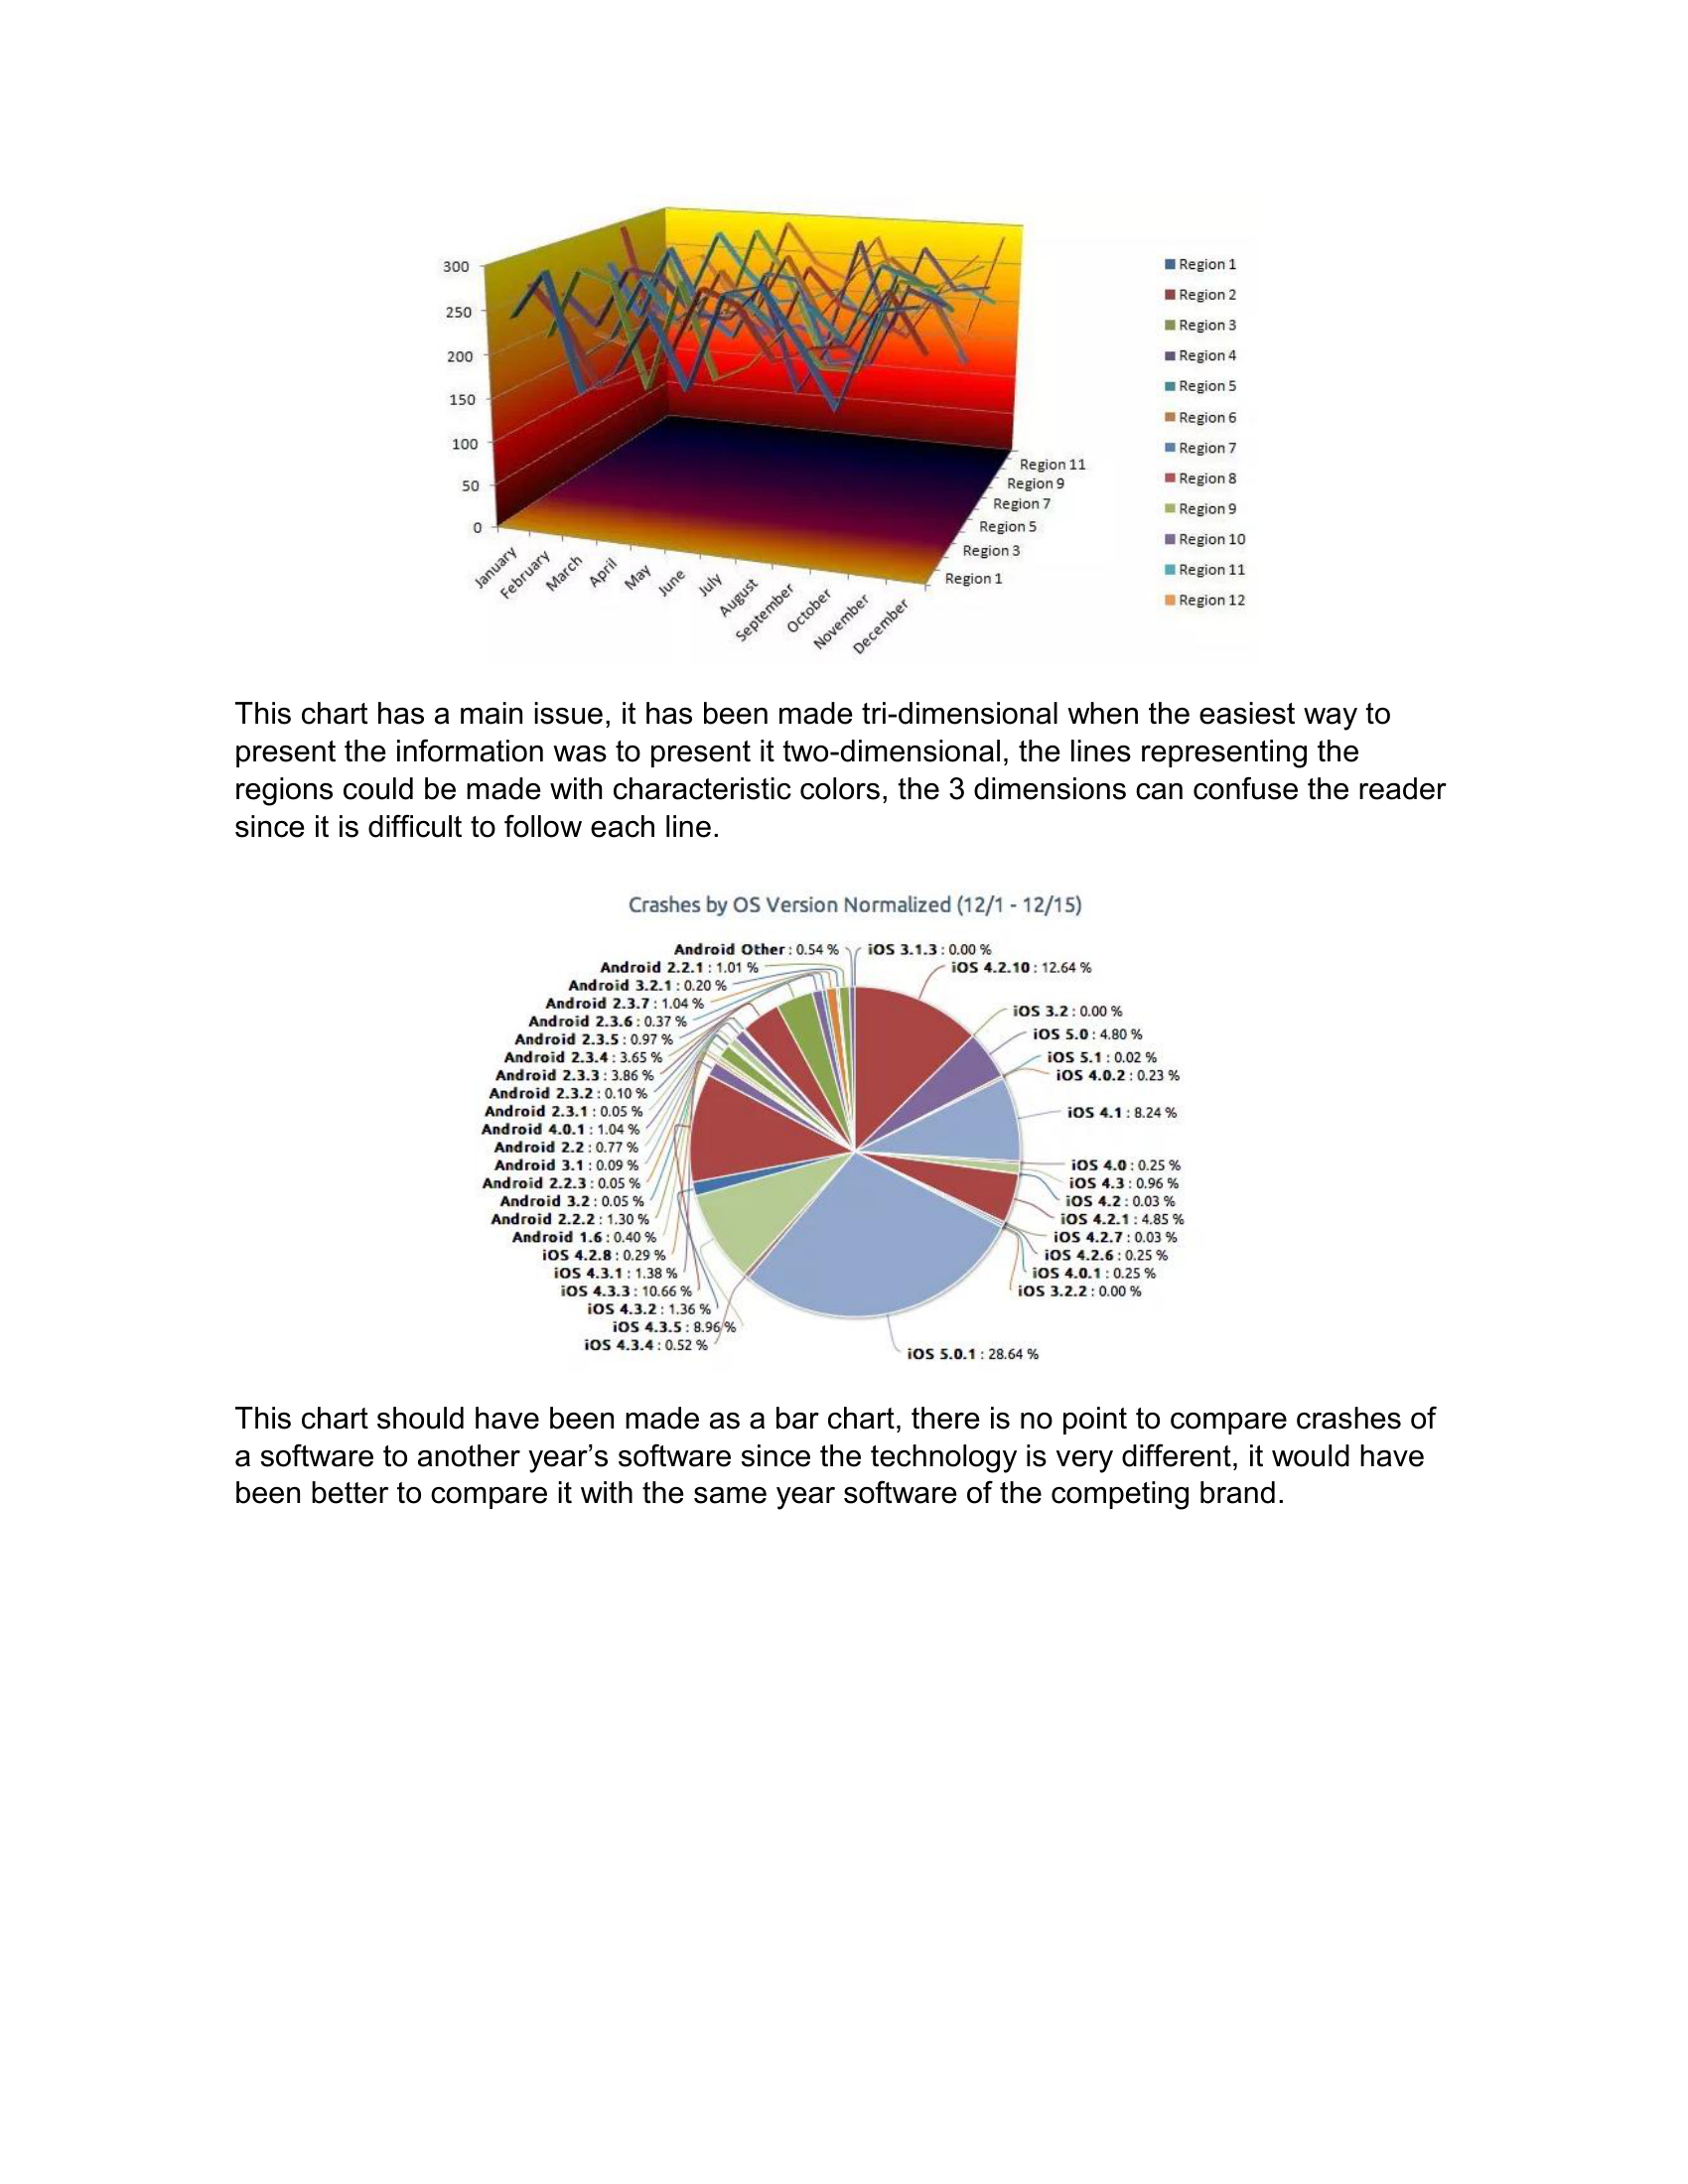

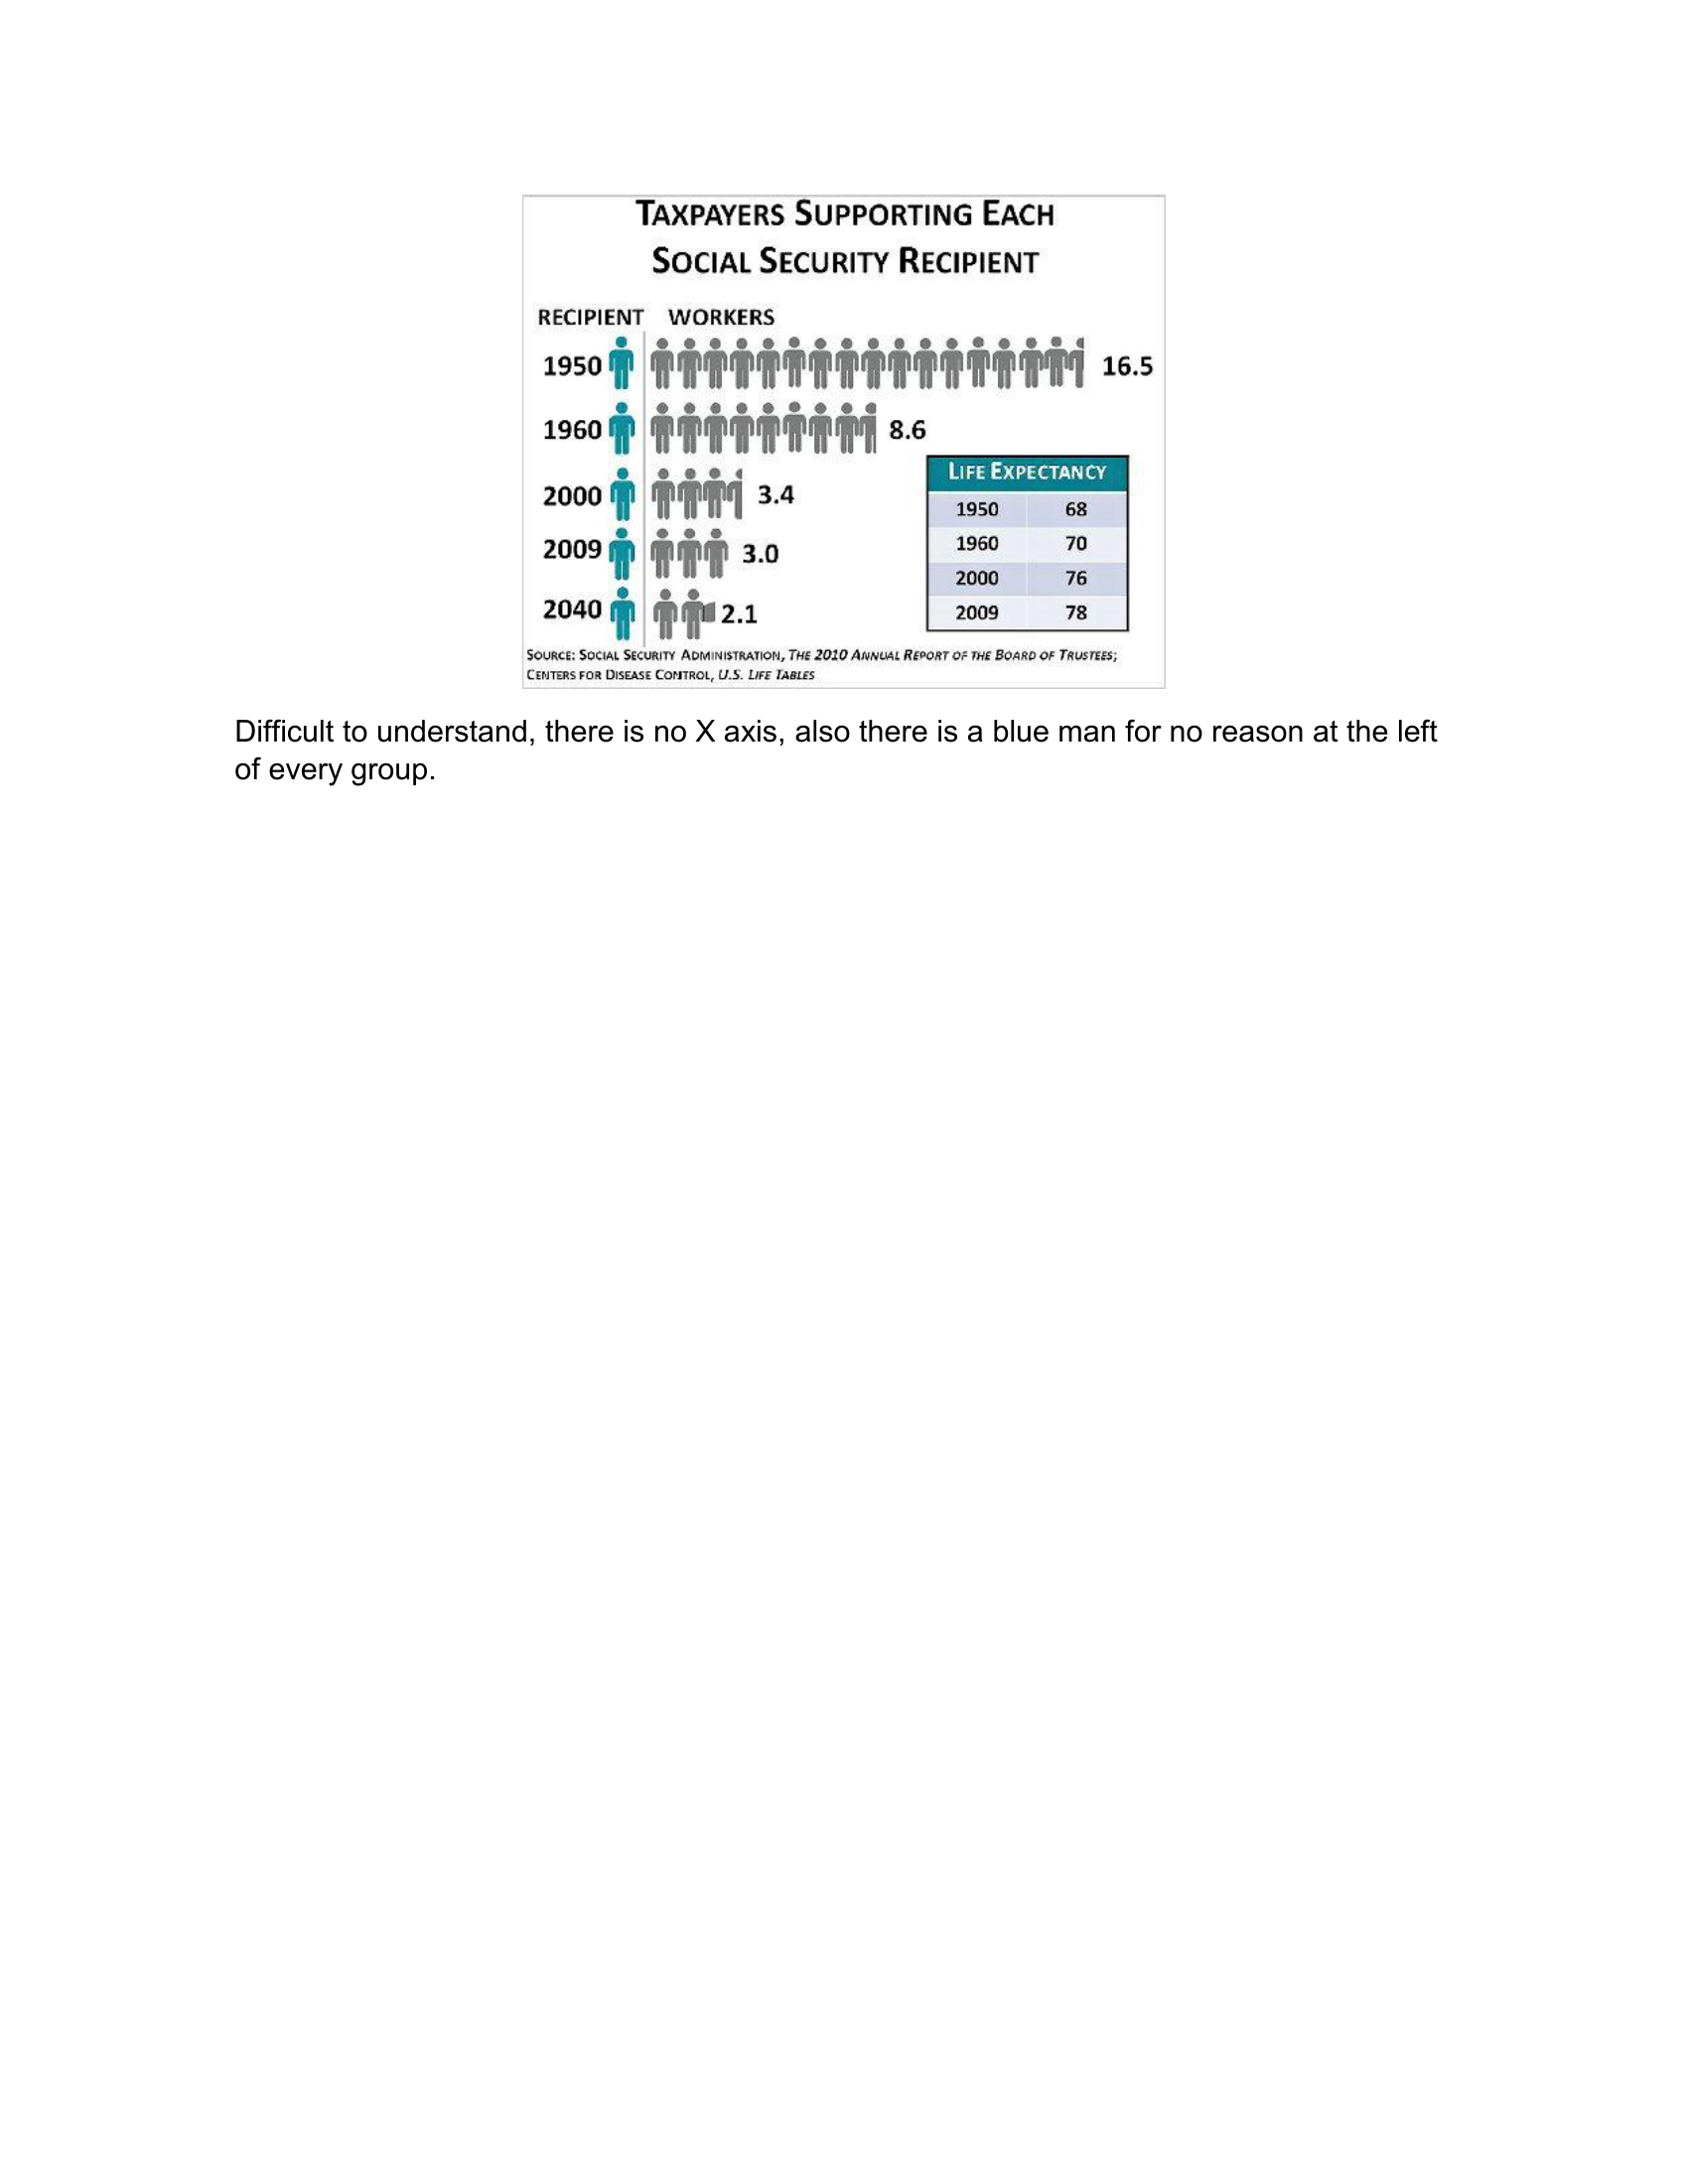

In [3]:
from pdf2image import convert_from_path
from IPython.display import display

# Convierte todas las páginas en imágenes
pages = convert_from_path("JunkCharts.pdf")

# Muestra cada página
for page in pages:
    display(page)
